In [1]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

вариант = len('МезенцевГлебВладимирович')%30
вариант

24

![](img/4_0.png)
![](img/4_1.png)

## Задание 4.1 (4.1.24)
![](img/4_2.png)
![](img/4_3.png)
![](img/4_4.png)

## Задаём условие

In [2]:
A = np.array([[118.8, -14, -5, -89.1],
              [-14.85, -20, -5, 0],
              [297, 16, 320, 0],
              [0, 6, -30, -36.3]])
b = np.array([943, -80.7, 2602.8, 1.1])

## Решаем систему Ax=b с помошью метода Гаусса (np.linalg.solve)

In [3]:
x = np.linalg.solve(A,b)
x

array([ 6.23545277, -1.19639624,  2.40629021, -2.21672407])

## Приводим Ax-b к виду x-Bx+c 

In [4]:
d = np.diag(A)
B = 1/d.reshape((-1,1))*(A-np.diag(d))
c = b/d

In [5]:
np.allclose(x, c-np.dot(B,x))

True

## Проверим достаточное условие сходимости методов Якоби и Зейделя
## ||B|| < 1

In [6]:
print('||B|| = ', np.linalg.norm(B, ord=np.inf))

||B|| =  0.9925


## Задаём начальное приближение

In [7]:
x0 = [1,-1,1,-1]

## Метод Якоби

In [8]:
def Jacobi(x0, B, c, maxiter = 1000, eps = 1e-9):
    norm = np.linalg.norm(B, ord = np.inf)
    eps = eps*(1-norm)/norm
    for i in range(maxiter):
        x = c - np.dot(B,x0)
        if np.linalg.norm(x-x0, ord = np.inf) < eps:
            return x, i
        else:
            x0 = np.copy(x)
    return x, maxiter

In [9]:
res_jac = Jacobi(x0, B, c)
print('Количество итераций до сходимости: ',res_jac[1])

Количество итераций до сходимости:  142


## Test

In [10]:
np.allclose(res_jac[0], x)

True

## Приводим Ax-b к виду x-Bx+c удобному для метода Зейделя

In [11]:
C = sp.solve_triangular(np.tril(A), np.eye(A.shape[0], A.shape[1]), lower=True)
B = np.dot(C, np.triu(A, 1))
c = np.dot(C, b)

In [12]:
np.allclose(x, c-np.dot(B,x))

True

## Метод Зейделя

In [13]:
def Seidel(x0, B, c, maxiter = 1000, eps = 1e-9):
    for i in range(maxiter):
        x = c - np.dot(B, x0)
        if np.linalg.norm(x-x0, ord = np.inf) < eps:
            return x, i
        else:
            x0 = np.copy(x)
    return x, maxiter        

In [14]:
res_sei = Seidel(x0, B, c)
print('Количество итераций до сходимости: ',res_sei[1])

Количество итераций до сходимости:  28


## Test

In [15]:
np.allclose(res_sei[0], x)

True

### Измеряем абсолютные погрешности итерационных решений для различных начальных приближений

In [16]:
for x0 in np.random.randint(-10, 10, (10,4)):
    x_it, n_iter = Seidel(x0, B, c, maxiter = 10)
    print('Абсолютная погрешность итеративного решения: %.3f' %np.linalg.norm(x-x_it, ord = np.inf))

Абсолютная погрешность итеративного решения: 0.002
Абсолютная погрешность итеративного решения: 0.003
Абсолютная погрешность итеративного решения: 0.005
Абсолютная погрешность итеративного решения: 0.003
Абсолютная погрешность итеративного решения: 0.004
Абсолютная погрешность итеративного решения: 0.002
Абсолютная погрешность итеративного решения: 0.002
Абсолютная погрешность итеративного решения: 0.001
Абсолютная погрешность итеративного решения: 0.002
Абсолютная погрешность итеративного решения: 0.003


### Скорость сходимости метода Зейделя, как, впрочем, и метода Якоби зависит от близости начального приближения к истинному ответу, поэтому для разных начальных приближений при ограничении на количество итераций мы получаем различные величины абсолютных погрешностей решений

## Задание 4.2
![](img/4_5.png)

In [17]:
res_sei = Seidel(x0, B, c, eps=1e-6)
print('Количество итераций до сходимости: ',res_sei[1])
print('Абсолютная погрешность решения:', np.linalg.norm(x-res_sei[0], ord = np.inf))

Количество итераций до сходимости:  20
Абсолютная погрешность решения: 8.179466446378569e-07


## Задание 4.4 (4.4.12)
![](img/4_6.png)
![](img/4_7.png)
![](img/4_8.png)

## Задаём условие

In [18]:
def B(t):
    return np.array([[-0.2, 0.15, 0.1, 0.3],
                     [0.1, 0.11, 0.4, np.sin(5*t)],
                     [0.3, 0.1, 0.2, 0.1],
                     [0.2, -0.12, 0.1, np.sin(t)]])

c = np.array([0, 1, 2, 3])
t_grid = np.arange(-1, 1.1, 0.2)

### Построим график

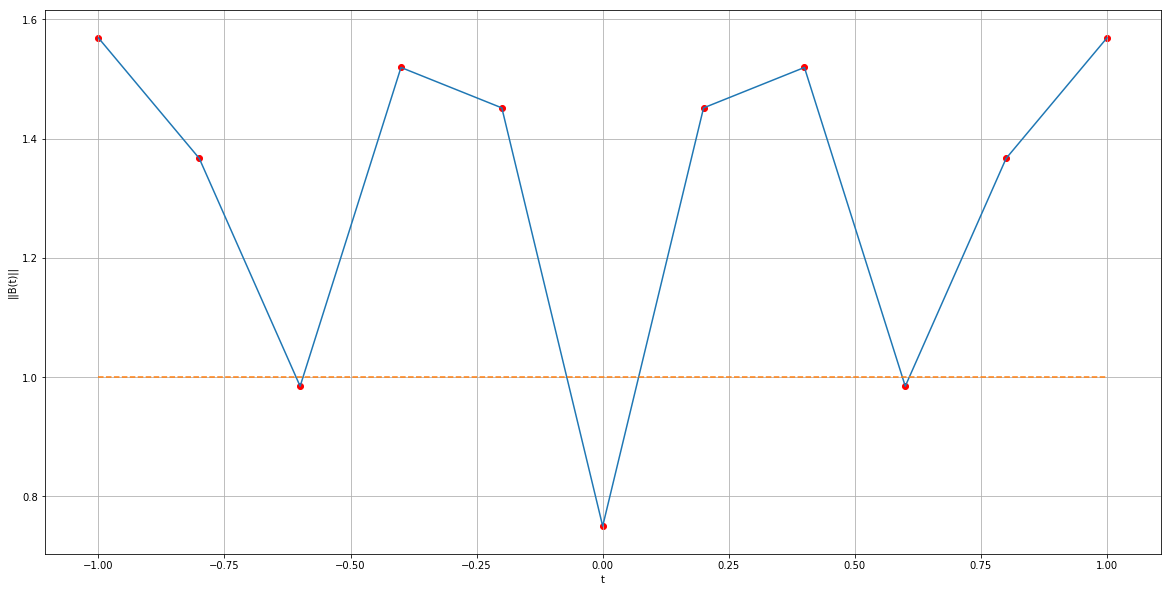

In [19]:
norm_grid = [np.linalg.norm(B(t), ord = np.inf) for t in t_grid]
plt.figure(figsize=(20,10))
plt.plot(t_grid, norm_grid)
plt.scatter(t_grid, norm_grid, c = 'r')
plt.plot(t_grid, np.ones(t_grid.shape), ls = '--')
plt.grid()
plt.xlabel('t')
plt.ylabel('||B(t)||');

### По графику видно, что достаточное условие сходимости выполнено для t = {-0.6, 0, 0.6}

In [20]:
t_max = t_grid[np.where(np.array(norm_grid)<1)[0]][-1]

In [21]:
res_sei = Seidel(np.random.rand(c.shape[0]), -B(t_max), c, eps = 1e-5)
print('Количество итераций до сходимости: ',res_sei[1])

Количество итераций до сходимости:  30


In [22]:
res_sei[0]

array([3.12090633, 5.15890587, 5.33109187, 8.12715206])

In [23]:
np.allclose(res_sei[0], np.dot(B(t_max), res_sei[0]) + c)

True

## Задание 4.6 (4.6.6)
![](img/4_9.png)
![](img/4_10.png)
![](img/4_11.png)

## Задаём условие

In [24]:
n = 50
d = 114 * np.ones(n)
ud = 31 * np.ones(n-2)
uud = 2 * np.ones(n-3)
b = np.arange(1, n+1) * np.exp(18/np.arange(1, n+1))

### Метод Зейеделя без хранения матриц

In [25]:
def Seidel_vec(x0, d, ud, uud, b, maxiter = 1000, eps = 1e-9):
    c = b / d
    ud = - ud / d[:ud.shape[0]]
    uud = - uud / d[:uud.shape[0]]
    for i in range(maxiter):
        x = ud[:n-3] * x0[2:n-1] + uud[:n-3] * x0[3:n]
        x = np.append(x, ud[n-3]*x0[-1])
        x = np.append(x, np.zeros(2))
        x += c
        if np.linalg.norm(x-x0, ord = np.inf) < eps:
            return x, i
        else:
            x0 = np.copy(x)
    return x, maxiter  

In [26]:
sei_res = Seidel_vec(np.random.rand(b.shape[0]), d, ud, uud, b)
print('Количество итераций до сходимости: ',sei_res[1])

Количество итераций до сходимости:  17


### Решим то же уровнение в лоб

### Явно сформируем матрицу А

In [28]:
A = np.diag(d) + np. diag(ud, 2) + np.diag(uud, 3)
A

array([[114.,   0.,  31., ...,   0.,   0.,   0.],
       [  0., 114.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 114., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 114.,   0.,  31.],
       [  0.,   0.,   0., ...,   0., 114.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 114.]])

### Решим систему с помощью метода Гаусса

In [29]:
gau_res = np.linalg.solve(A, b)

### Проверим верность полученного ответа

In [30]:
np.allclose(sei_res[0], gau_res)

True

### Всё верно